In [62]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [29]:
#create a set of random latitude and longitude combitnations
lats = np.random.uniform(low=-90.000,high= 90.000, size=1500)
lngs = np.random.uniform(low=-90.000,high=90.000, size=1500)
lats_lngs=zip(lats,lngs)

In [30]:
coordinates=list(lats_lngs)

In [31]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

punta arenas cl
taolanaro mg
tumannyy ru
warrington us
tasiilaq gl
paris us
aksarka ru
kruisfontein za
ushuaia ar
touros br
chapais ca
chipinge zw
amderma ru
brumunddal no
ribeira grande pt
santa isabel do rio negro br
illoqqortoormiut gl
buzmeyin tm
orangeburg us
challapata bo
klaksvik fo
ushuaia ar
port alfred za
belushya guba ru
tazovskiy ru
saint-joseph re
dingle ie
praia da vitoria pt
slatina-timis ro
elizabeth city us
nioro ml
punta arenas cl
east london za
zaraza ve
synya ru
bayir jo
mahibadhoo mv
victoria sc
barentsburg sj
bongandanga cd
jamestown sh
lasa cn
cotonou bj
praia da vitoria pt
constitucion cl
hermanus za
kutum sd
tasiilaq gl
victoria sc
bredasdorp za
conde br
bonito br
richards bay za
tasiilaq gl
dakar sn
waling np
souillac mu
necochea ar
mirandopolis br
mar del plata ar
taolanaro mg
georgetown sh
tessalit ml
taolanaro mg
capoeiras br
cap malheureux mu
iqaluit ca
saint george bm
ostrovnoy ru
ornskoldsvik se
rio grande br
ushuaia ar
port alfred za
dikson ru
duz tn
ki

hermanus za
tasiilaq gl
riyadh sa
los llanos de aridane es
ushuaia ar
arraial do cabo br
port hawkesbury ca
attawapiskat ca
jamestown sh
illoqqortoormiut gl
saint-philippe re
ushuaia ar
olafsvik is
ponta do sol cv
kayerkan ru
cape town za
tsihombe mg
port elizabeth za
ushuaia ar
taolanaro mg
ancud cl
mehamn no
punta arenas cl
torbay ca
hermanus za
ushuaia ar
hermanus za
kruisfontein za
vilhena br
tasiilaq gl
victoria sc
gat ly
torbay ca
hamilton bm
sao joao da barra br
arraial do cabo br
umzimvubu za
lolodorf cm
san pedro del pinatar es
constanta ro
east london za
miraflores co
los andes cl
weston us
narsaq gl
taolanaro mg
marcona pe
jamestown sh
bobonong bw
saint-philippe re
saint george bm
port alfred za
dikson ru
port alfred za
mossendjo cg
talcahuano cl
ilula tz
richards bay za
port alfred za
sinnamary gf
cape town za
abu samrah qa
attawapiskat ca
namibe ao
rawson ar
port alfred za
ushuaia ar
bathsheba bb
tsihombe mg
matara lk
margate za
nanortalik gl
hermanus za
yarmouth ca
bussel

carnarvon au
pokhara np
axim gh
thinadhoo mv
barentsburg sj
jamestown sh
port alfred za
tazovskiy ru
hobyo so
djougou bj
illoqqortoormiut gl
jamestown sh
benghazi ly
ponta do sol cv
gao ml
punta arenas cl
los llanos de aridane es
attawapiskat ca
khandbari np
mar del plata ar
dikson ru
hermanus za
upata ve
kayerkan ru
dingle ie
taolanaro mg
ponta do sol cv
salalah om
barentsburg sj
ushuaia ar
matiari pk
ushuaia ar
grand river south east mu
ushuaia ar
husavik is
webuye ke
skoghall se
qaanaaq gl
taolanaro mg
sao filipe cv
porto torres it
torbay ca
ponta delgada pt
tsihombe mg
kuzhorskaya ru
port elizabeth za
jamestown sh
busselton au
santa cruz de la palma es
taolanaro mg
ponta do sol cv
upernavik gl
santa marta co
richards bay za
port blair in
hermanus za
illoqqortoormiut gl
cap malheureux mu
the valley ai
praia cv
delhi ca
camacha pt
bar-le-duc fr
iqaluit ca
mar del plata ar
rorvik no
mani co
taolanaro mg
arraial do cabo br
rawah iq
ponta do sol cv
eskasem af
manta ec
oistins bb
gambela

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [33]:
url="https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=85e88150062045398183e4ab76ba60d3


In [34]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=85e88150062045398183e4ab76ba60d3&q=Boston


In [35]:
city_weather=requests.get(city_url)
city_weather

<Response [200]>

In [36]:
city_weather.status_code

200

In [37]:
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":66.22,"feels_like":65.95,"temp_min":62.01,"temp_max":69.01,"pressure":1023,"humidity":88},"visibility":10000,"wind":{"speed":8.05,"deg":160},"clouds":{"all":100},"dt":1603308529,"sys":{"type":1,"id":4967,"country":"US","sunrise":1603278272,"sunset":1603317162},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [38]:
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 66.22,
  'feels_like': 65.95,
  'temp_min': 62.01,
  'temp_max': 69.01,
  'pressure': 1023,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 160},
 'clouds': {'all': 100},
 'dt': 1603308529,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1603278272,
  'sunset': 1603317162},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [39]:
boston_data = city_weather.json()
boston_data["sys"]

{'type': 1,
 'id': 4967,
 'country': 'US',
 'sunrise': 1603278272,
 'sunset': 1603317162}

In [40]:
boston_data["sys"]["country"]

'US'

In [41]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 69.01 88 100 8.05


In [42]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 10, 21, 19, 28, 49)

In [43]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 1 | warrington
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | paris
Processing Record 7 of Set 1 | aksarka
Processing Record 8 of Set 1 | kruisfontein
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | chapais
Processing Record 12 of Set 1 | chipinge
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | brumunddal
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | santa isabel do rio negro
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | buzmeyin
Processing Record 19 of Set 1 | orangeburg
Processing Record 20 

Processing Record 34 of Set 4 | bahia blanca
Processing Record 35 of Set 4 | longyearbyen
Processing Record 36 of Set 4 | pasni
Processing Record 37 of Set 4 | tarudant
City not found. Skipping...
Processing Record 38 of Set 4 | barth
Processing Record 39 of Set 4 | jaru
Processing Record 40 of Set 4 | gangotri
City not found. Skipping...
Processing Record 41 of Set 4 | lixourion
Processing Record 42 of Set 4 | oranjestad
Processing Record 43 of Set 4 | serenje
Processing Record 44 of Set 4 | thilogne
City not found. Skipping...
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | mungwi
Processing Record 47 of Set 4 | saint anthony
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | port blair
Processing Record 50 of Set 4 | cochabamba
Processing Record 1 of Set 5 | areosa
Processing Record 2 of Set 5 | calbuco
Processing Record 3 of Set 5 | saint-leu
Processing Record 4 of Set 5 | qaqortoq
Processing Record 5 of Set 5 | itarema
Processing Reco

Processing Record 23 of Set 8 | tsogni
Processing Record 24 of Set 8 | angoche
Processing Record 25 of Set 8 | melilla
Processing Record 26 of Set 8 | hualmay
Processing Record 27 of Set 8 | manavalakurichi
Processing Record 28 of Set 8 | dapaong
Processing Record 29 of Set 8 | maghama
City not found. Skipping...
Processing Record 30 of Set 8 | pyshchug
Processing Record 31 of Set 8 | cayenne
Processing Record 32 of Set 8 | grand gaube
Processing Record 33 of Set 8 | mezen
Processing Record 34 of Set 8 | cherkasskoye
Processing Record 35 of Set 8 | salisbury
Processing Record 36 of Set 8 | keskin
Processing Record 37 of Set 8 | bilma
Processing Record 38 of Set 8 | veraval
Processing Record 39 of Set 8 | pucallpa
Processing Record 40 of Set 8 | kaoma
Processing Record 41 of Set 8 | pavlogradka
Processing Record 42 of Set 8 | marzuq
Processing Record 43 of Set 8 | geresk
City not found. Skipping...
Processing Record 44 of Set 8 | inhambane
Processing Record 45 of Set 8 | kuytun
Processi

Processing Record 15 of Set 12 | pokhara
Processing Record 16 of Set 12 | axim
Processing Record 17 of Set 12 | djougou
Processing Record 18 of Set 12 | benghazi
Processing Record 19 of Set 12 | gao
Processing Record 20 of Set 12 | khandbari
Processing Record 21 of Set 12 | upata
Processing Record 22 of Set 12 | matiari
Processing Record 23 of Set 12 | webuye
Processing Record 24 of Set 12 | skoghall
Processing Record 25 of Set 12 | porto torres
Processing Record 26 of Set 12 | kuzhorskaya
Processing Record 27 of Set 12 | santa marta
Processing Record 28 of Set 12 | the valley
Processing Record 29 of Set 12 | delhi
Processing Record 30 of Set 12 | camacha
Processing Record 31 of Set 12 | bar-le-duc
Processing Record 32 of Set 12 | rorvik
Processing Record 33 of Set 12 | mani
Processing Record 34 of Set 12 | rawah
Processing Record 35 of Set 12 | eskasem
City not found. Skipping...
Processing Record 36 of Set 12 | manta
Processing Record 37 of Set 12 | gambela
Processing Record 38 of Se

In [44]:
len(city_data)

596

In [45]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,50.00,43,90,10.29,CL,2020-10-21 19:31:55
1,Warrington,53.39,-2.58,55.40,87,75,5.82,GB,2020-10-21 19:31:56
2,Tasiilaq,65.61,-37.64,30.20,80,75,3.36,GL,2020-10-21 19:31:57
3,Paris,48.85,2.35,64.40,67,20,12.75,FR,2020-10-21 19:30:42
4,Aksarka,66.56,67.80,19.09,97,97,12.97,RU,2020-10-21 19:31:58
5,Kruisfontein,-34.00,24.73,57.99,74,0,2.93,ZA,2020-10-21 19:31:59
6,Ushuaia,-54.80,-68.30,55.40,43,75,5.82,AR,2020-10-21 19:31:25
7,Touros,-5.20,-35.46,77.00,94,75,11.41,BR,2020-10-21 19:27:37
8,Chapais,49.78,-74.85,32.00,99,90,10.29,CA,2020-10-21 19:32:00
9,Chipinge,-20.19,32.62,63.70,95,34,7.11,ZW,2020-10-21 19:32:00


In [46]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]

In [47]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-10-21 19:31:55,-53.15,-70.92,50.00,43,90,10.29
1,Warrington,GB,2020-10-21 19:31:56,53.39,-2.58,55.40,87,75,5.82
2,Tasiilaq,GL,2020-10-21 19:31:57,65.61,-37.64,30.20,80,75,3.36
3,Paris,FR,2020-10-21 19:30:42,48.85,2.35,64.40,67,20,12.75
4,Aksarka,RU,2020-10-21 19:31:58,66.56,67.80,19.09,97,97,12.97


In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [50]:
today = time.strftime("%x")
today


'10/21/20'

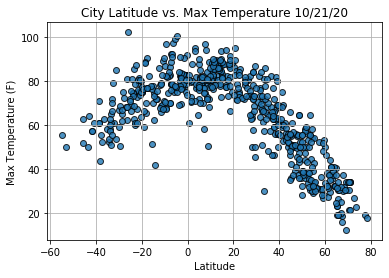

In [51]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

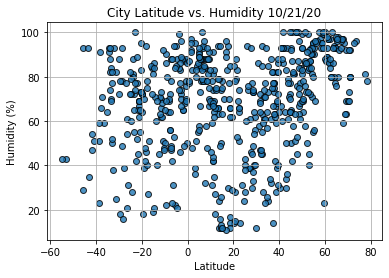

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

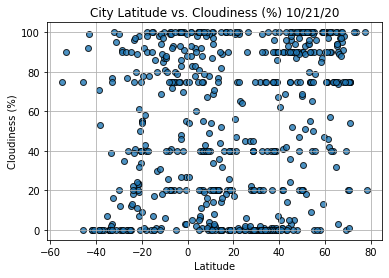

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

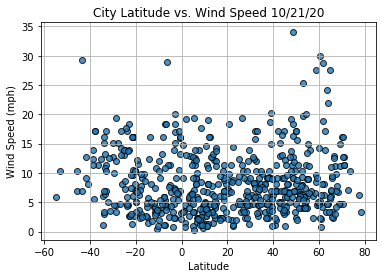

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [99]:
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = [(lat * slope + intercept) for lat in x_values]
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [100]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Warrington,GB,2020-10-21 19:31:56,53.39,-2.58,55.40,87,75,5.82
2,Tasiilaq,GL,2020-10-21 19:31:57,65.61,-37.64,30.20,80,75,3.36
3,Paris,FR,2020-10-21 19:30:42,48.85,2.35,64.40,67,20,12.75
4,Aksarka,RU,2020-10-21 19:31:58,66.56,67.80,19.09,97,97,12.97
8,Chapais,CA,2020-10-21 19:32:00,49.78,-74.85,32.00,99,90,10.29


In [101]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

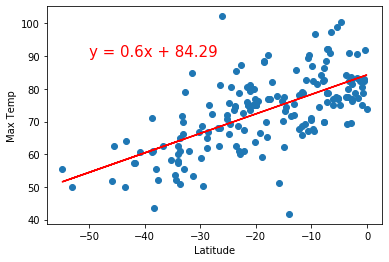

In [102]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

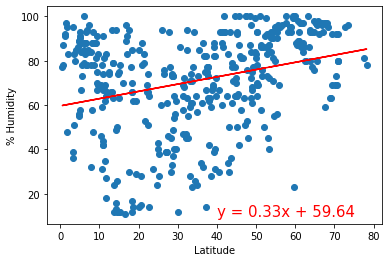

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

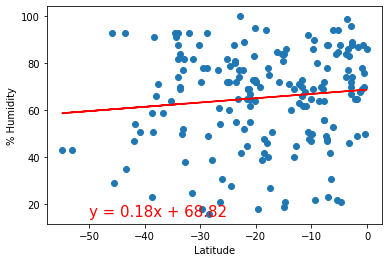

Index(['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity',
       'Cloudiness', 'Wind Speed'],
      dtype='object')

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))
southern_hemi_df.columns

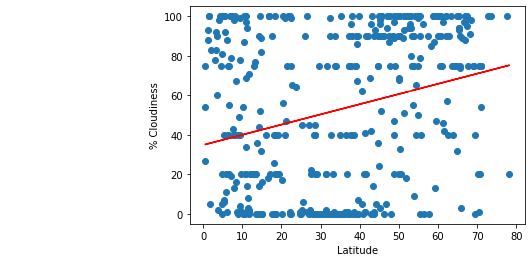

In [105]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

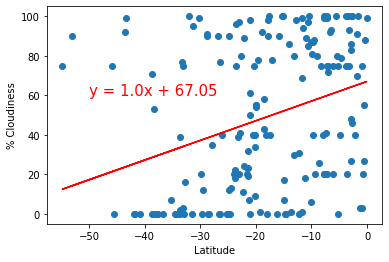

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

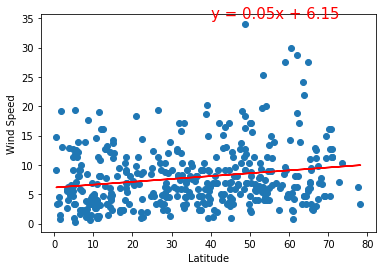

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

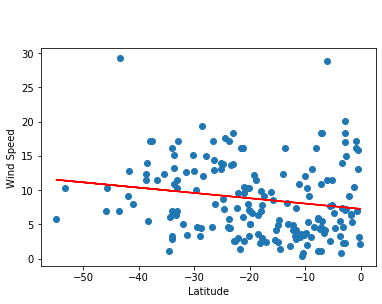

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))